# Model Training with Artificial Neural Network

## Importing Dataset

In [11]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utils.BatchableDataset import BatchableDataset

train_dataset = BatchableDataset('../../datasets/processed/train_data.pt')
test_dataset = BatchableDataset('../../datasets/processed/test_data.pt')

c:\Users\LENOVO\Documents\wiwie\study\artificial-intelligence\ruangguru-engineering-academy\assignment\project-3b-dl-pytorch\hand-writing-digit-classifier\utils\BatchableDataset.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHu

## Initializing Neural Network

In [12]:
import torch.nn as nn

class DigitClassifierNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(8**2, 64)
        self.layer_2 = nn.Linear(64, 10)
        self.ReLU = nn.ReLU()
        
    def forward(self, x):
        x = x.reshape(-1, 8**2)
        x = self.ReLU(self.layer_1(x))
        x = self.layer_2(x)
        return x.squeeze()
    
digit_classifier_NN = DigitClassifierNN()

## Training Neural Network

In [13]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [14]:
from torch.optim import SGD
import numpy as np

def train_neural_network(data_loader, neural_network, n_epochs=20):
    optimizer = SGD(neural_network.parameters(), lr=0.25)
    loss_function = nn.CrossEntropyLoss()

    losses = []
    epochs = []
    for epoch in range(n_epochs):
        # print(f'Epoch {epoch}')
        N = len(data_loader)
        
        for i, (images, labels) in enumerate(data_loader):   
            outputs = neural_network(images)
            loss_value = loss_function(outputs, labels)
            
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            epochs.append(epoch + i / N)
            losses.append(loss_value.item())
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, n_epochs, loss_value.item()))
            
    return np.array(epochs), np.array(losses)

In [15]:
epoch_data, loss_data = train_neural_network(train_data_loader, digit_classifier_NN, n_epochs=40)

Epoch [1/40], Loss: 2.3061
Epoch [1/40], Loss: 2.2749
Epoch [1/40], Loss: 2.3045
Epoch [1/40], Loss: 2.3256
Epoch [1/40], Loss: 2.3056
Epoch [1/40], Loss: 2.2738
Epoch [1/40], Loss: 2.3084
Epoch [1/40], Loss: 2.3209
Epoch [1/40], Loss: 2.2711
Epoch [1/40], Loss: 2.2950
Epoch [1/40], Loss: 2.2993
Epoch [1/40], Loss: 2.2669
Epoch [1/40], Loss: 2.2612
Epoch [1/40], Loss: 2.2771
Epoch [1/40], Loss: 2.3260
Epoch [1/40], Loss: 2.3400
Epoch [1/40], Loss: 2.3155
Epoch [1/40], Loss: 2.2484
Epoch [1/40], Loss: 2.2226
Epoch [1/40], Loss: 2.3745
Epoch [1/40], Loss: 2.2830
Epoch [1/40], Loss: 2.3456
Epoch [1/40], Loss: 2.3177
Epoch [1/40], Loss: 2.4390
Epoch [1/40], Loss: 2.3003
Epoch [1/40], Loss: 2.3467
Epoch [1/40], Loss: 2.3599
Epoch [1/40], Loss: 2.2966
Epoch [1/40], Loss: 2.3173
Epoch [1/40], Loss: 2.2758
Epoch [1/40], Loss: 2.3202
Epoch [1/40], Loss: 2.3413
Epoch [1/40], Loss: 2.2963
Epoch [1/40], Loss: 2.2725
Epoch [1/40], Loss: 2.3233
Epoch [1/40], Loss: 2.3686
Epoch [1/40], Loss: 2.3393
E

Text(0.5, 1.0, 'Cross Entropy (per batch)')

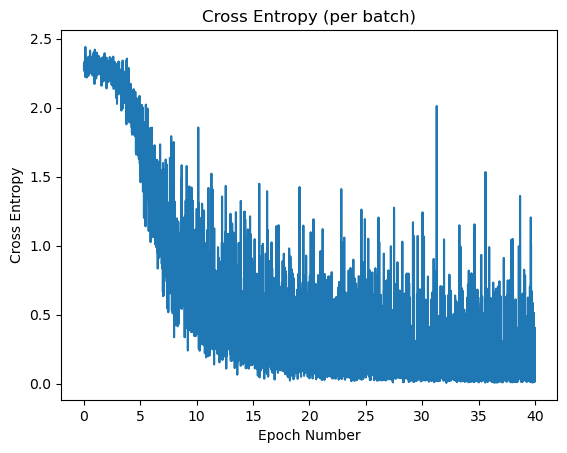

In [16]:
import matplotlib.pyplot as plt

plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

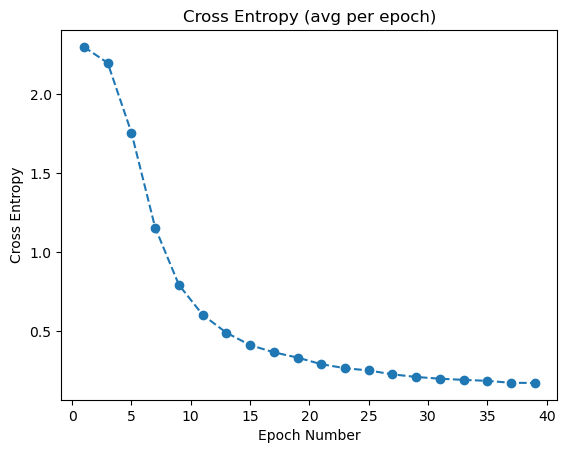

In [17]:
import matplotlib.pyplot as plt

epoch_data_avg = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avg = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avg, loss_data_avg, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avg per epoch)')
plt.savefig('../../visualization/cross_entropy.png')
plt.show()

## Evaluating Neural Network

In [18]:
import torch
import torch.nn as nn

def accuracy(outputs, labels):
    labels = torch.argmax(labels, dim=1)
    _, predictions = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

loss_function = nn.CrossEntropyLoss()

with torch.no_grad():
    sum_acc = 0
    for images, labels in test_data_loader:
        outputs = digit_classifier_NN(images)
        loss = loss_function(outputs, labels)
        acc = accuracy(outputs, labels)
        sum_acc += acc
    
    print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(loss.item(), sum_acc/len(test_data_loader)))

Test loss: 0.0191, Test accuracy: 0.9306


## Visualizing Predicted Results

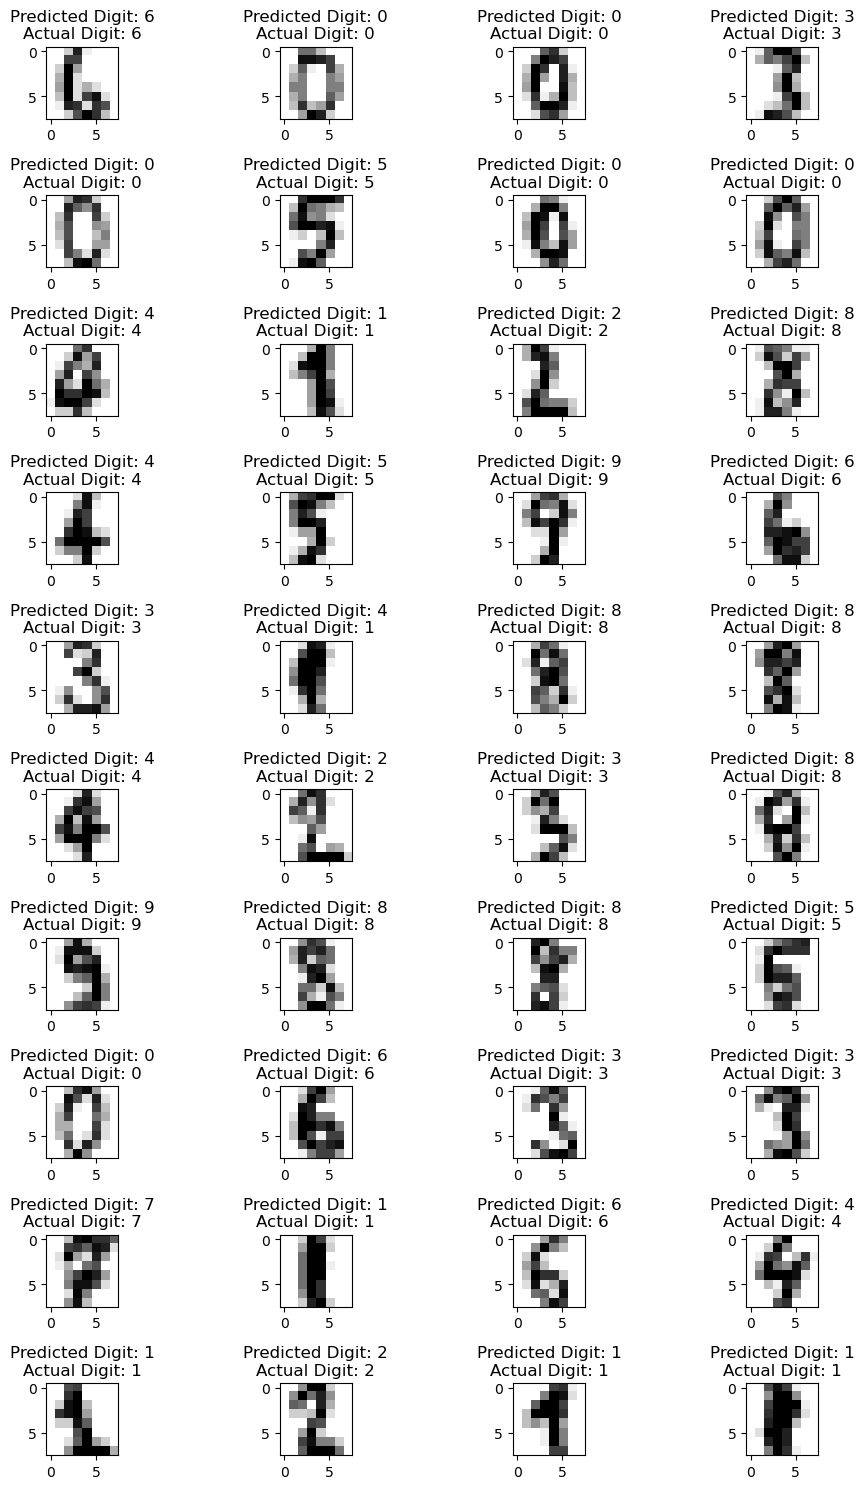

In [19]:
images, one_hot_labels = train_dataset[0:40]
actual_labels = one_hot_labels.argmax(axis=1)
predicted_labels = digit_classifier_NN(images).argmax(axis=1)

fig, ax = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted Digit: {predicted_labels[i]}\nActual Digit: {actual_labels[i]}')
    
fig.tight_layout()
plt.show()

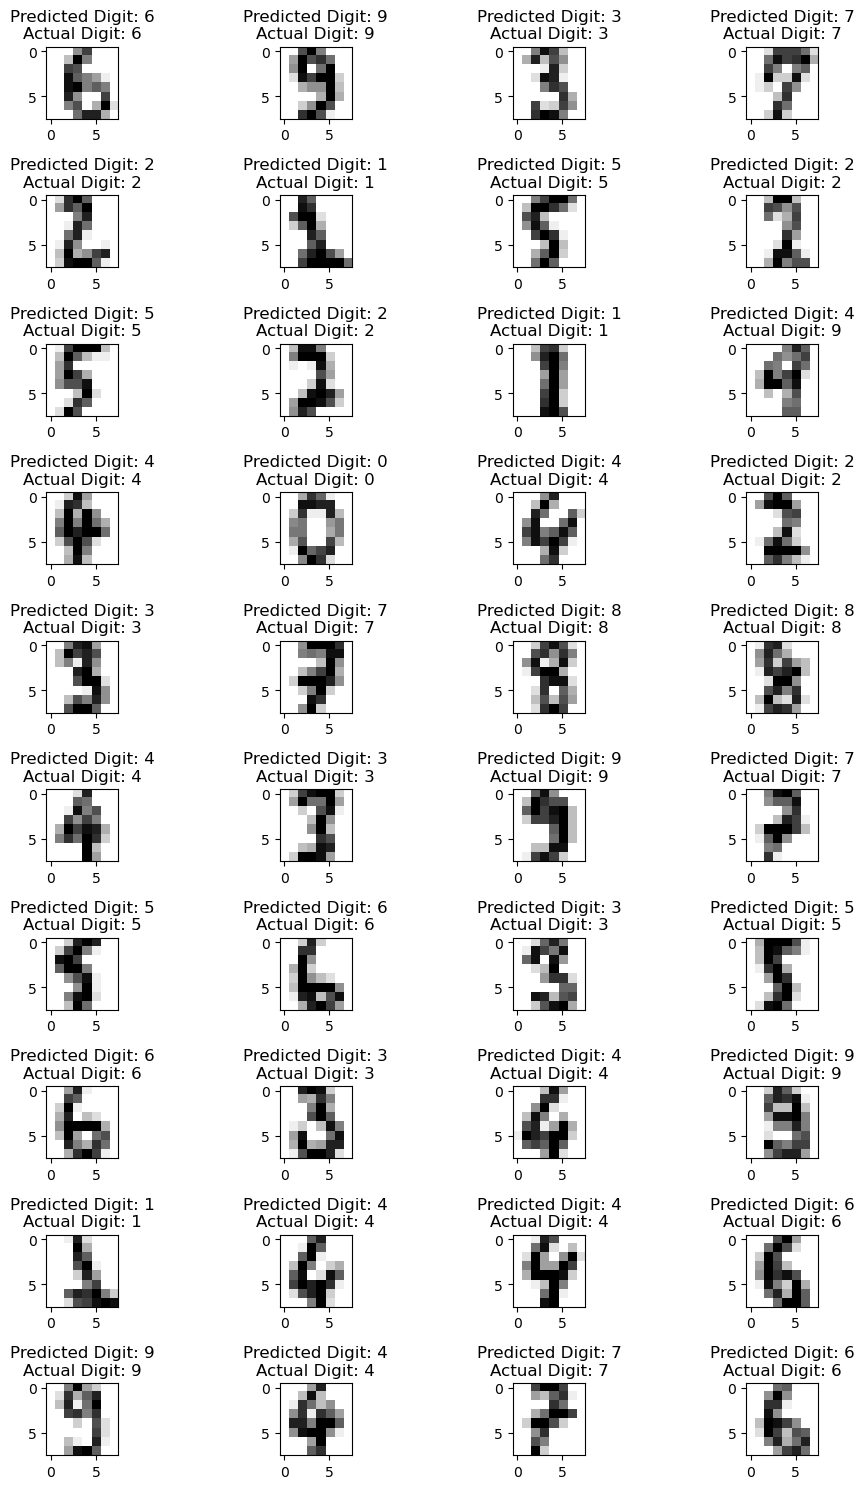

In [20]:
images, one_hot_labels = test_dataset[:40]
actual_labels = one_hot_labels.argmax(axis=1)
predicted_labels = digit_classifier_NN(images).argmax(axis=1)

fig, ax = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted Digit: {predicted_labels[i]}\nActual Digit: {actual_labels[i]}')
    
fig.tight_layout()
plt.savefig('../../visualization/predictions.png')
plt.show()